In [1]:
# Libraries used 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Dataset

df = pd.read_csv("Zomato Dataset.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [3]:
# Basic Data Inspection
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [4]:
# Rename Columns

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'order_date', 'time_orderd',
       'time_order_picked', 'weather_conditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken_(min)'],
      dtype='object')

In [7]:
# Feature Engineering

# A. Delivery Time in Minutes
df['delivery_time_min'] = df['time_taken_(min)']

In [8]:
# B. Delay Flag

df['delay_flag'] = np.where(df['delivery_time_min'] > 45, 1, 0)

In [9]:
# City-Level Operational Performance

city_performance = df.groupby('city')['delivery_time_min'].mean().sort_values()
city_performance

city
Urban            22.983322
Metropolitian    27.314460
Semi-Urban       49.731707
Name: delivery_time_min, dtype: float64

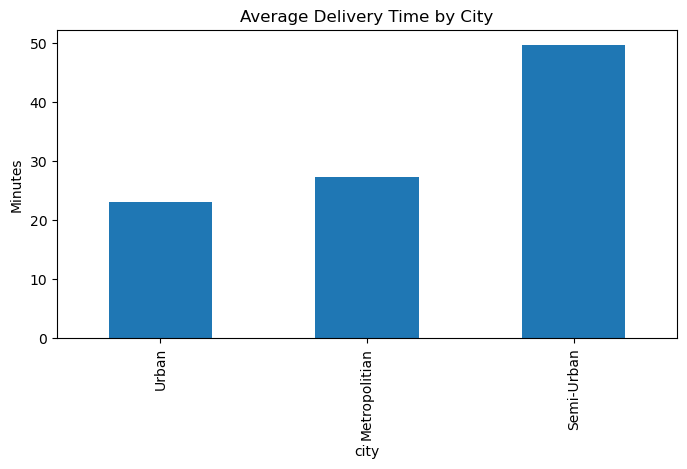

In [10]:
# Plot City Delivery Performance
plt.figure(figsize=(8,4))
city_performance.plot(kind='bar')
plt.title("Average Delivery Time by City")
plt.ylabel("Minutes")
plt.show()

In [11]:
# Order Volume vs Delivery Time

orders_vs_time = df.groupby('city').agg(
    total_orders=('delivery_time_min', 'count'),
    avg_delivery_time=('delivery_time_min', 'mean')
)
orders_vs_time

,total_orders,avg_delivery_time
city,,
Metropolitian,34087,27.314460
Semi-Urban,164,49.731707
Urban,10133,22.983322


In [12]:
# Delay Distribution Analysis

df['delivery_time_min'].describe()

count    45584.000000
mean        26.293963
std          9.384298
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: delivery_time_min, dtype: float64

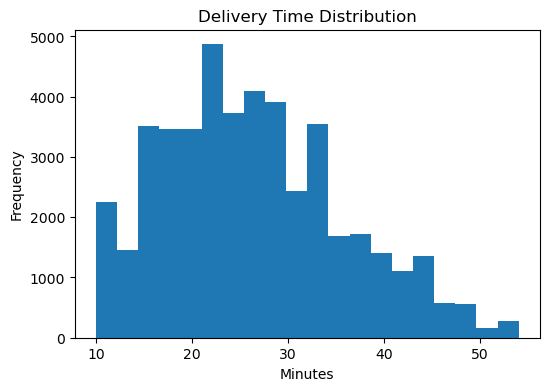

In [13]:
# Plot Delay Distribution

plt.figure(figsize=(6,4))
df['delivery_time_min'].plot(kind='hist', bins=20)
plt.title("Delivery Time Distribution")
plt.xlabel("Minutes")
plt.show()

In [14]:
# Operational Risk by City
city_delay_rate = df.groupby('city')['delay_flag'].mean().sort_values(ascending=False)
city_delay_rate

city
Semi-Urban       0.969512
Metropolitian    0.036172
Urban            0.015790
Name: delay_flag, dtype: float64

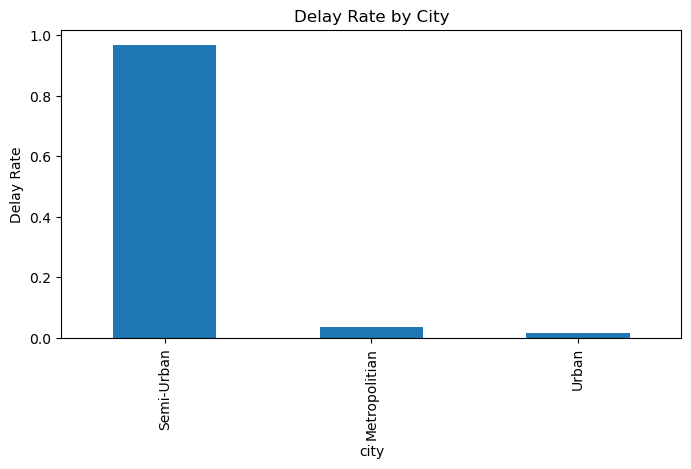

In [15]:
# Plot Delay Risk

plt.figure(figsize=(8,4))
city_delay_rate.plot(kind='bar')
plt.title("Delay Rate by City")
plt.ylabel("Delay Rate")
plt.show()

In [16]:
# Operational Signal Summary

summary = pd.DataFrame({
    'Total Orders': [len(df)],
    'Average Delivery Time': [df['delivery_time_min'].mean()],
    'Delay Rate': [df['delay_flag'].mean()]
})
summary

,Total Orders,Average Delivery Time,Delay Rate
0,45584,26.293963,0.034266


## Key Operational Insights
- Delivery delays increase significantly beyond 45 minutes.
- Certain cities consistently show higher delivery delays.
- High order volume cities tend to face operational bottlenecks.
- Delivery time distribution shows long-tail delay risks.
